In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as spl
%matplotlib inline

In [37]:
def checkTypes(phaseVec, omega):
    if not isinstance(phaseVec, np.ndarray):
        print("The phase vector must be a numpy array.")
        return False
    if not isinstance(omega, np.ndarray):
        print("The angular velocity vector must be a numpy array.")
        return False
    if not phaseVec.shape[0] == 2:
        print("The phase vector must be a 2xN matrix, where N is the number of particles")
        return False
    if not phaseVec.shape[1] == omega.shape[0]:
        print("The number of particles in the phase vector (2xN) and the angular velocity vector (N) don't match.")
        return False
    return True

DEFAULT_OMEGA_0 = 0.10
DEFAULT_ALPHA = 0.005

def calcAction(phaseVec, beta):
    return (np.square(phaseVec[0,]) + np.square(phaseVec[1,]))/(2*beta)

def setOmega(phaseVec, omega_0 = DEFAULT_OMEGA_0, omega_prime = DEFAULT_ALPHA, beta = 10):
    J = calcAction(phaseVec, beta)
#     print("Actions: ", J)
    newOmega  = omega_0 + omega_prime*J
#     print("Omegas: ", newOmega)
    return newOmega
    
def recordTurnData(phaseVec, omega, n):
    averagePositionCoords = np.empty(n)
    J = np.empty(n)
    theta = np.empty(n)
    phaseVecVideo = np.empty((n, 2, phaseVec.shape[1]))
    for i in range(0, n):
        averagePositionCoords[i] = np.sum(phaseVec[0,])/phaseVec.shape[1]
#         print("Average Position: ", averagePositionCoords[i])
        J[i] = np.sum(np.square(phaseVec[0,]) + np.square(phaseVec[1,]))/phaseVec.shape[1]
        theta[i] = np.arctan(-phaseVec[1,0]/phaseVec[0,0])
        phaseVecVideo[i,] = phaseVec
        phaseVec = turn(phaseVec, omega)
    return (phaseVec, averagePositionCoords, J, theta, phaseVecVideo)


def plotTurns(phaseVec, omega, n, positionFig, actionFig, thetaFig, startStep=0):
    (phaseVec, averagePositionCoords, J, theta, _) = recordTurnData(phaseVec, omega, n)
    positionFig.plot(range(startStep, startStep+n), averagePositionCoords, marker='o')
    actionFig.plot(range(startStep, startStep+n), J, marker='o')
    thetaFig.plot(range(startStep, startStep+n), theta, marker='o')
    return phaseVec, averagePositionCoords

def turn(phaseVec, omega, n=1, timestep=1):
    if not checkTypes(phaseVec, omega):
        return
    newPhaseVec =  np.empty((2, phaseVec.shape[1]))
    theta = n*timestep*omega
    newPhaseVec[0,] = np.multiply(np.cos(theta), phaseVec[0,]) - np.multiply(np.sin(theta), phaseVec[1,])
    newPhaseVec[1,] = np.multiply(np.cos(theta), phaseVec[1,]) + np.multiply(np.sin(theta), phaseVec[0,])
    return newPhaseVec
    
def dipoleKick(phaseVec, omega, k, omega_0 = DEFAULT_OMEGA_0, alpha = DEFAULT_ALPHA):
    if not checkTypes(phaseVec, omega):
        return
    newPhaseVec =  np.empty((2, phaseVec.shape[1]))
    print(newPhaseVec.shape, phaseVec.shape, k)
    newPhaseVec[0,] = phaseVec[0,]
    newPhaseVec[1,] = phaseVec[1,] + k
    newOmega = setOmega(newPhaseVec, omega_0, alpha)
    return (newPhaseVec, newOmega)
    
def quadrapoleKick(phaseVec, omega, k, omega_0 = DEFAULT_OMEGA_0, alpha = DEFAULT_ALPHA): 
    if not checkTypes(phaseVec, omega):
        return
    newPhaseVec =  np.empty((2, phaseVec.shape[1]))
    newPhaseVec[0,] = phaseVec[0,]
    newPhaseVec[1,] = phaseVec[1,] + k*phaseVec[0,]
    newOmega = setOmega(newPhaseVec, omega_0, alpha)
    return (newPhaseVec, newOmega)

def sextapoleKick(phaseVec, omega, k, omega_0 = DEFAULT_OMEGA_0, alpha = DEFAULT_ALPHA): 
    if not checkTypes(phaseVec, omega):
        return
    newPhaseVec =  np.empty((2, phaseVec.shape[1]))
    newPhaseVec[0,] = phaseVec[0,]
    newPhaseVec[1,] = phaseVec[1,] + k*np.square(phaseVec[0,])
    newOmega = setOmega(newPhaseVec, omega_0, alpha)
    return (newPhaseVec, newOmega)

def octapoleKick(phaseVec, omega, k, omega_0 = DEFAULT_OMEGA_0, alpha = DEFAULT_ALPHA): 
    if not checkTypes(phaseVec, omega):
        return
    newPhaseVec =  np.empty((2, phaseVec.shape[1]))
    newPhaseVec[0,] = phaseVec[0,]
    newPhaseVec[1,] = phaseVec[1,] + k*np.power(phaseVec[0,], 3)
    newOmega = setOmega(newPhaseVec, omega_0, alpha)
    return (newPhaseVec, newOmega)

In [38]:
numPoints = 20000
tau = 1400
omega_0 = 2*np.pi*0.245
omega_prime = 2*np.pi*-3009
epsilon = 0.0000001 # meters^2
beta = 10


sigma = np.sqrt(beta*epsilon)
q = 1/(np.sqrt(2)*omega_prime*epsilon*tau)
minTau = 1/(omega_prime*epsilon)

print("Sigma : ", sigma, "meters")
print("Optimal q: ", q)
print("Minimum Tau: ", minTau)
print(omega_prime)

Sigma :  0.001 meters
Optimal q:  -0.2671498350653712
Minimum Tau:  -528.9296879092567
-18906.104589303373


(2, 20000) (2, 20000) 0.001


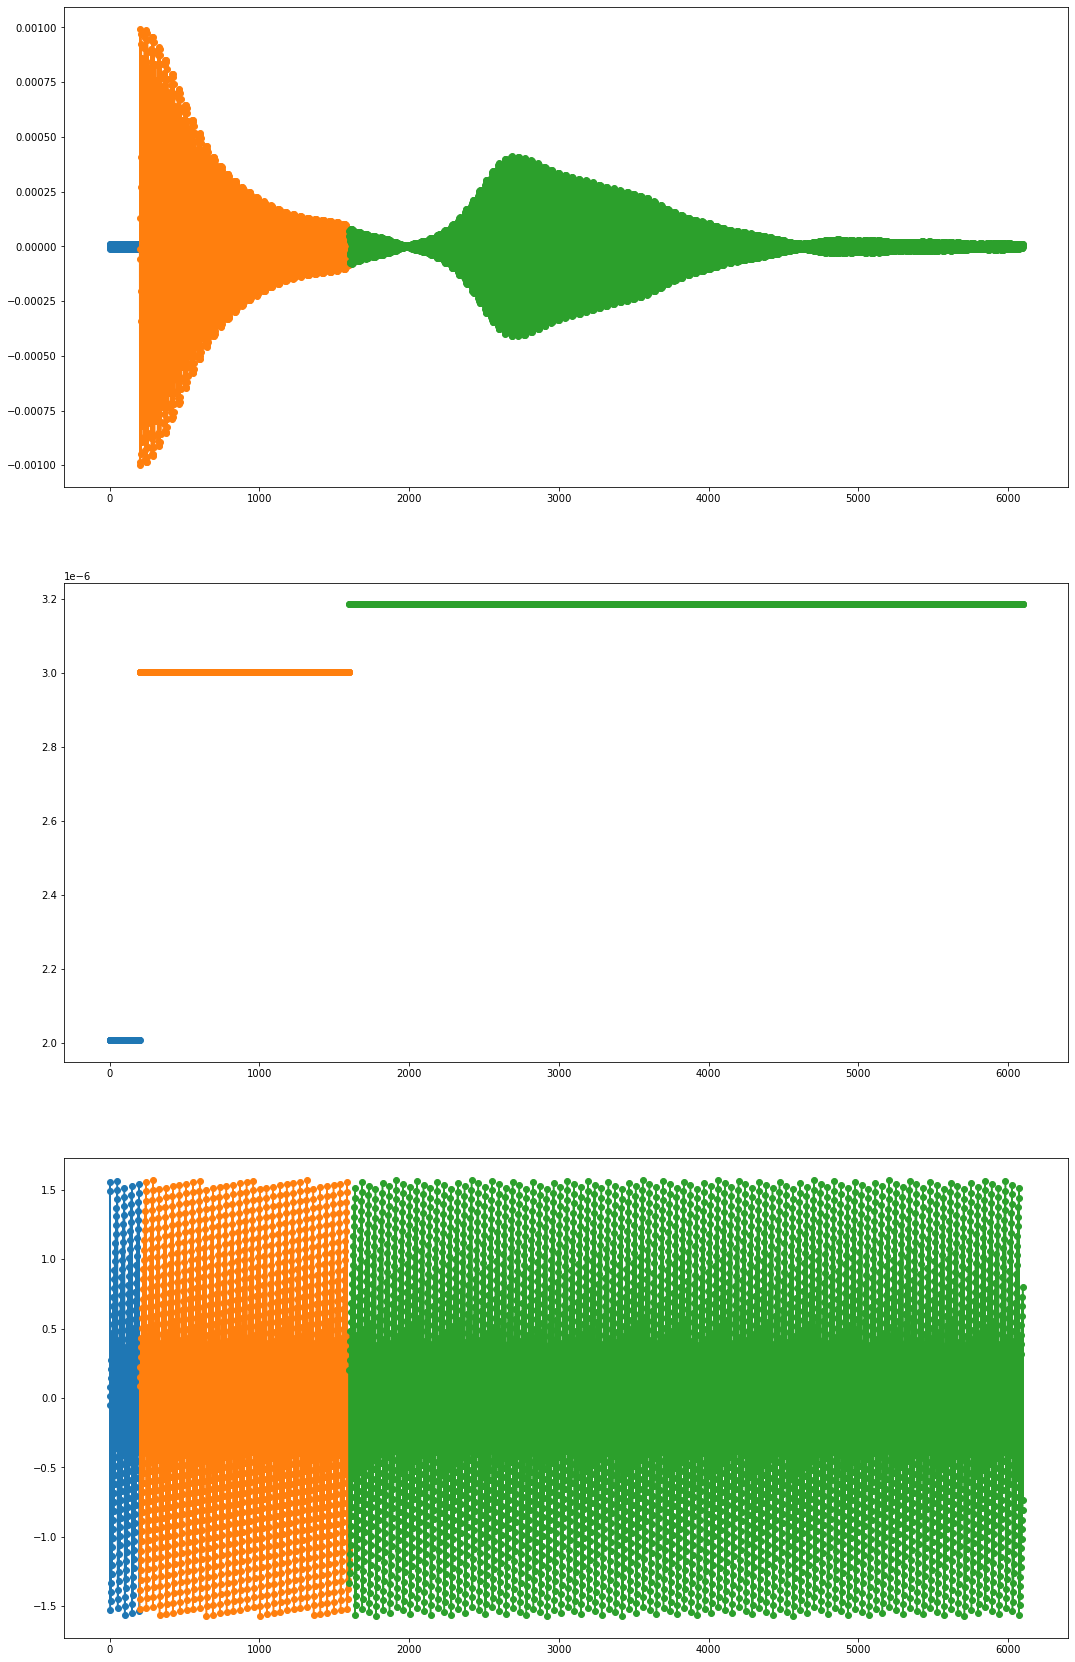

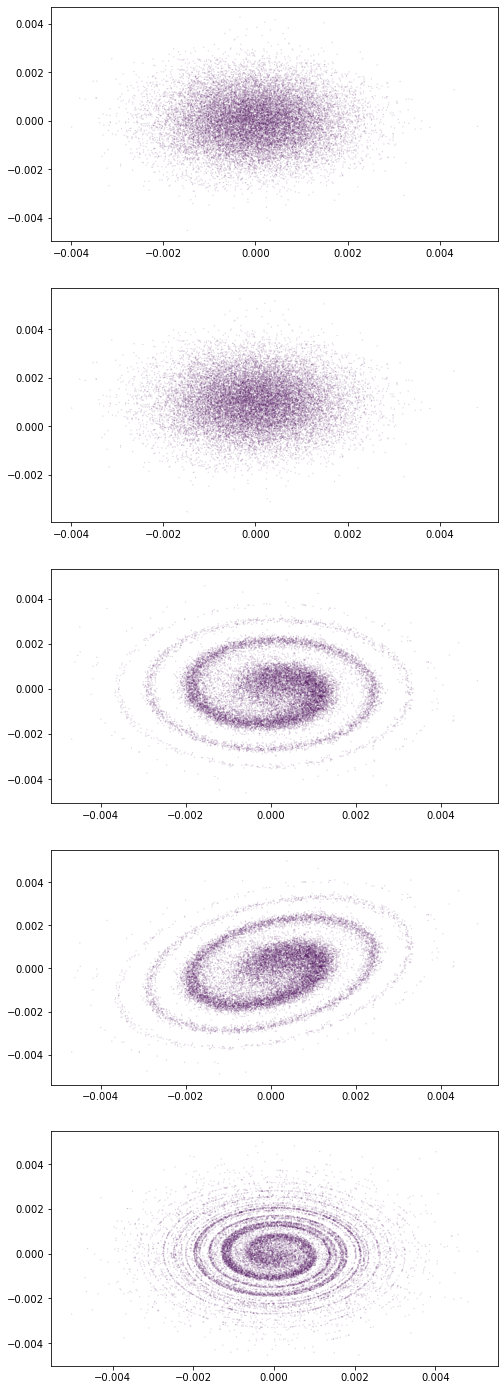

In [86]:
phaseVec = np.empty((2, numPoints))
phaseVec[0,] = np.random.normal(0.0, sigma, size=(1,numPoints))
phaseVec[1,] = np.random.normal(0.0, sigma, size=(1,numPoints))
omega = setOmega(phaseVec, omega_0, omega_prime)
fig, (axPos, axJ, axTheta) = plt.subplots(3,1)
phaseVec, averagePositionCoords = plotTurns(phaseVec, omega, 200, axPos, axJ, axTheta)
fig2, (ax3, ax4, ax5, ax6, ax7) = plt.subplots(5,1)
ax3.scatter(phaseVec[0,], phaseVec[1,], marker='o', s=np.full(phaseVec.shape[1], 0.005), c=np.full(phaseVec.shape[1], 0))
(phaseVec, omega) = dipoleKick(phaseVec, omega, 0.001, omega_0, omega_prime)
ax4.scatter(phaseVec[0,], phaseVec[1,], marker='o', s=np.full(phaseVec.shape[1], 0.005), c=np.full(phaseVec.shape[1], 0))
phaseVec, averagePositionCoords = plotTurns(phaseVec, omega, tau, axPos, axJ, axTheta, startStep=200)
ax5.scatter(phaseVec[0,], phaseVec[1,], marker='o', s=np.full(phaseVec.shape[1], 0.005), c=np.full(phaseVec.shape[1], 0))
(phaseVec, omega) = quadrapoleKick(phaseVec, omega, 0.35, omega_0, omega_prime)
ax6.scatter(phaseVec[0,], phaseVec[1,], marker='o', s=np.full(phaseVec.shape[1], 0.005), c=np.full(phaseVec.shape[1], 0))
phaseVec, averagePositionCoords = plotTurns(phaseVec, omega, 4500, axPos, axJ, axTheta, startStep=tau+200)
ax7.scatter(phaseVec[0,], phaseVec[1,], marker='o', s=np.full(phaseVec.shape[1], 0.005), c=np.full(phaseVec.shape[1], 0))
fig.figsize = (10,15)
fig.set_size_inches(18.0, 30.0)
fig2.set_size_inches(8.0, 25.0)
fig.savefig("EchoPlot.pdf")
fig2.savefig("SpiralPlots.pdf")

<ipython-input-61-e170cd8096f7>:13: ComplexWarning: Casting complex values to real discards the imaginary part
  sp[i,:] = np.fft.fft(phaseVecVideo2[:,0,i])


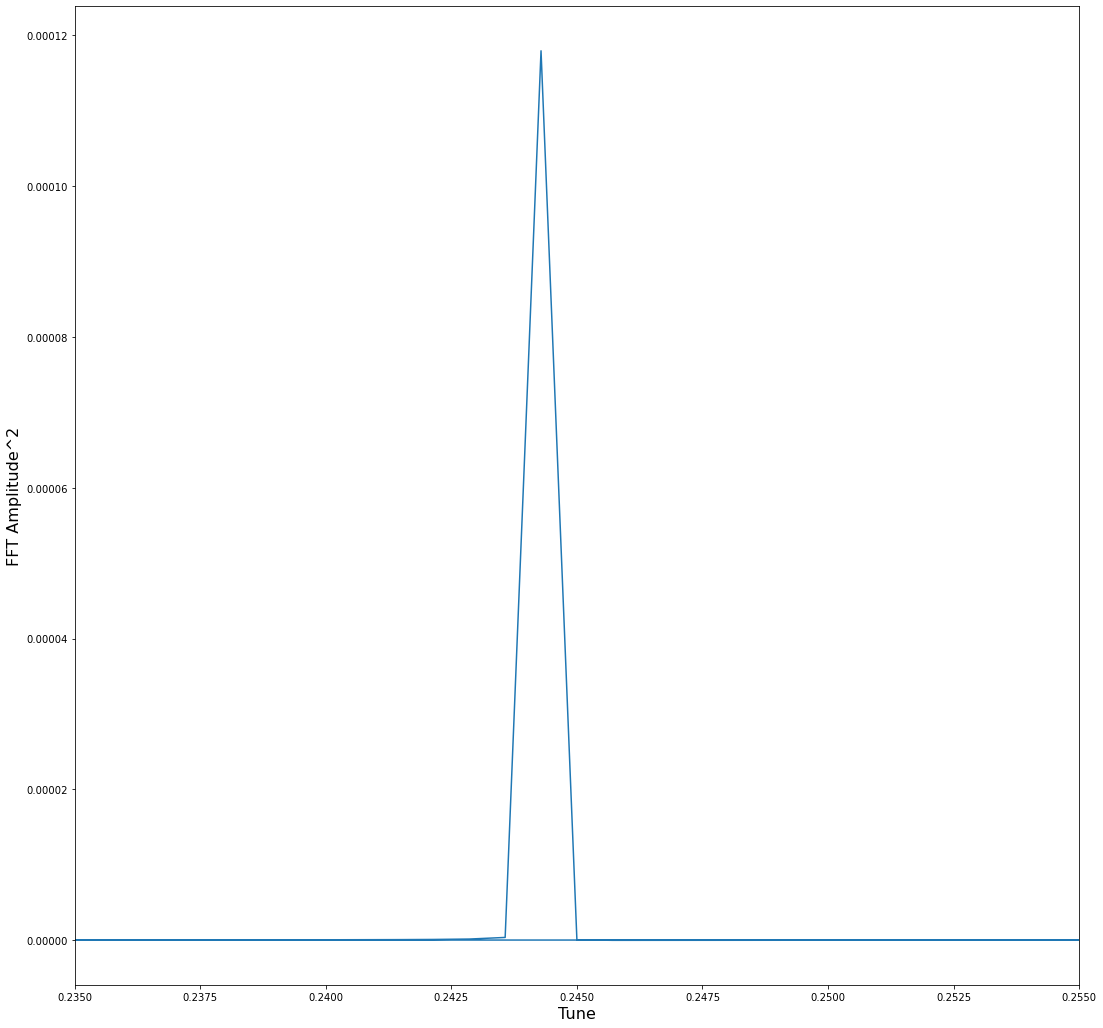

In [61]:
phaseVec = np.empty((2, numPoints))
phaseVec[0,] = np.random.normal(0.0, sigma, size=(1,numPoints))
phaseVec[1,] = np.random.normal(0.0, sigma, size=(1,numPoints))
omega = setOmega(phaseVec, omega_0, omega_prime)
fig, axFreq = plt.subplots(1,1)
phaseVec, averagePositionCoords, J, theta, phaseVecVideo1 = recordTurnData(phaseVec, omega, 1400)

sp = np.empty((phaseVecVideo2.shape[2], phaseVecVideo2.shape[0]))
freqIndex = np.empty(phaseVecVideo2.shape[2])
action = np.empty(phaseVecVideo2.shape[2])

for i in range(0, phaseVecVideo2.shape[2]):
    sp[i,:] = np.fft.fft(phaseVecVideo2[:,0,i])
    freqIndex[i] = np.argmax(sp[i,:])
    action[i] = calcAction(phaseVecVideo2[0,:,i], 10)
    
freq = np.fft.fftfreq(phaseVecVideo2.shape[0])

orderFreq = [np.abs(freq[int(i)]) for i in freqIndex]

axFreq.plot(freq, np.square(sp.real[0,:]))
axFreq.set_xlabel("Tune", fontsize=16)
axFreq.set_ylabel("FFT Amplitude^2", fontsize=16)
axFreq.set_xlim([0.235, 0.255])
fig.figsize = (10,15)
fig.set_size_inches(18.0, 18.0)
fig.savefig("TunePlot.pdf")

<ipython-input-72-6c26990481da>:17: ComplexWarning: Casting complex values to real discards the imaginary part
  sp[i,:] = np.fft.fft(phaseVecVideo2[:,0,i])


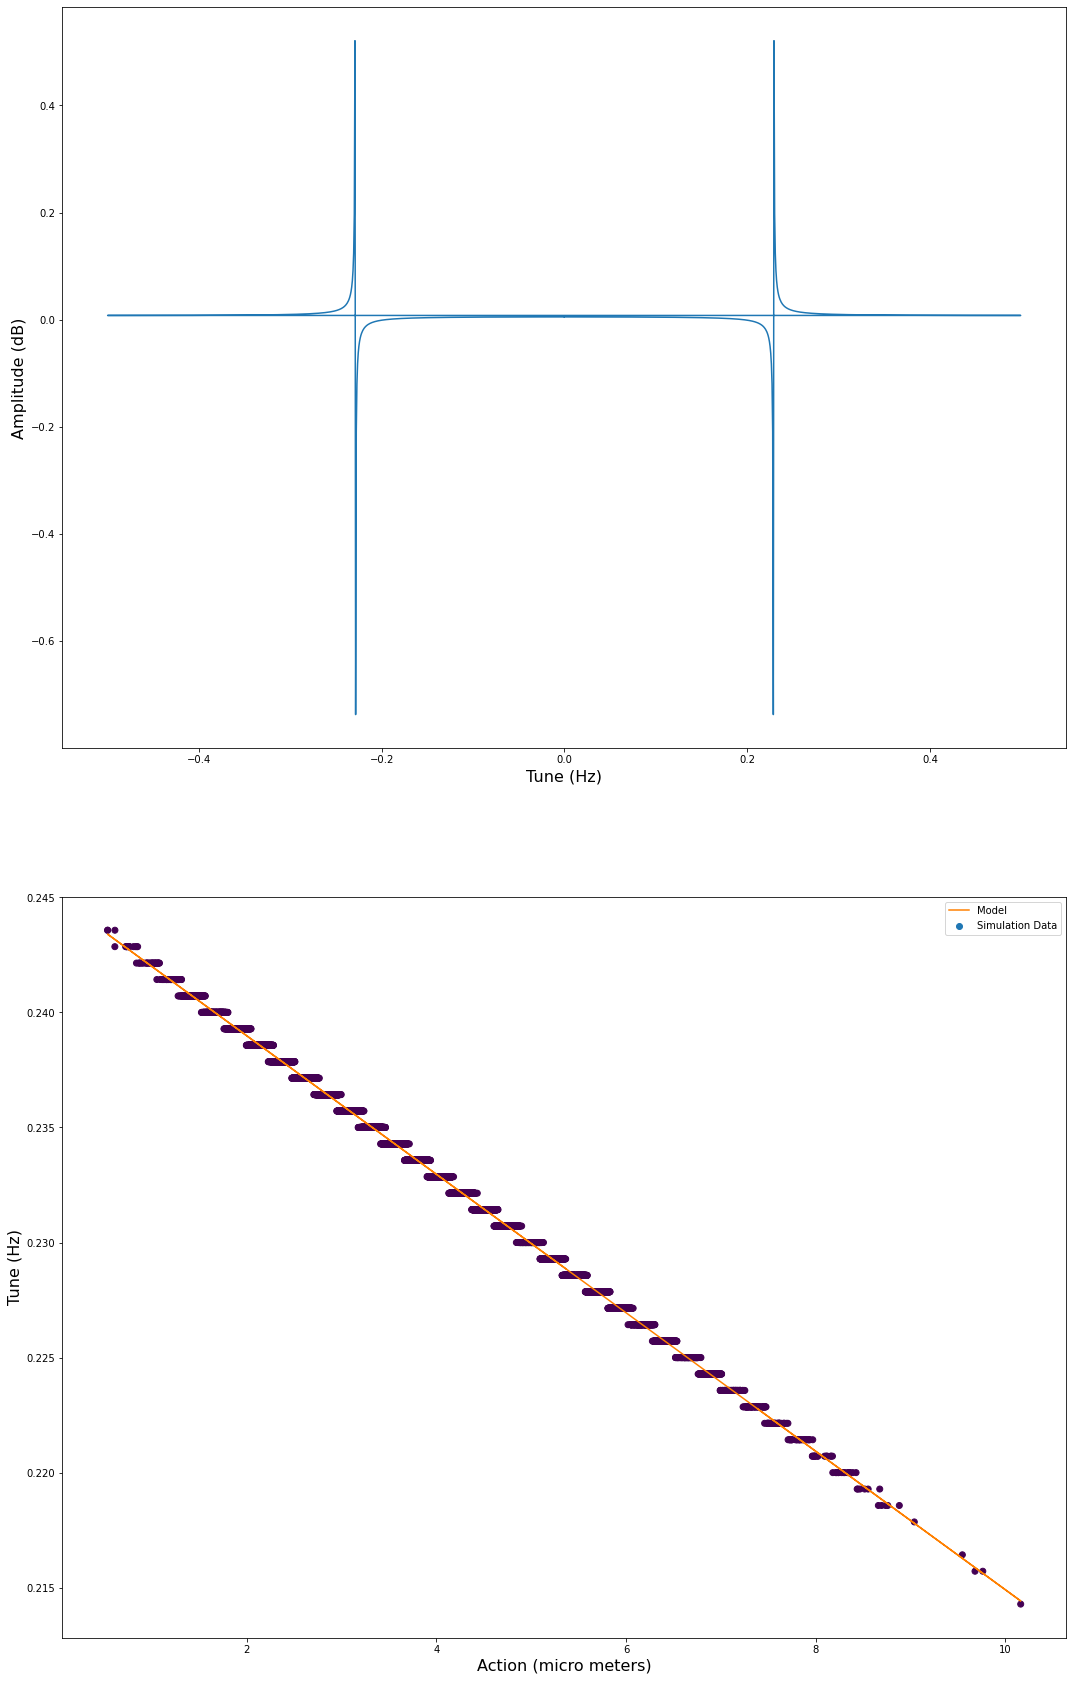

In [72]:
fig, axActionVFreq = plt.subplots(1,1)

axActionVFreq.scatter(np.power(10, 6)*action, orderFreq, label="Simulation Data", c=np.full(phaseVec.shape[1], 0))
axActionVFreq.plot(np.power(10,6)*action, (omega_0 + omega_prime*action)/(2*np.pi), label="Model", c=(1,0.5,0))
axActionVFreq.set_xlabel("Action (micro meters)", fontsize=16)
axActionVFreq.set_ylabel("Tune (Hz)", fontsize=16)
axActionVFreq.legend()


fig.figsize = (10,15)
fig.set_size_inches(18.0, 30.0)
fig.savefig("ActionVTuneCheck.pdf")

Starting 1 mm DPK
Starting 3 mm DPK
Starting 4 mm DPK
Starting 6 mm DPK


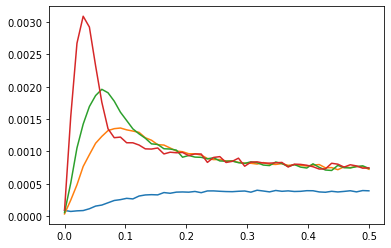

In [46]:
def runEchoSimulation(numPoints, tau, epsilon, Dp, q, omega_0, omega_prime, total_time, beta=10):
    phaseVec = np.empty((2, numPoints))
    phaseVec[0,] = np.random.normal(Dp, np.sqrt(beta*epsilon), size=(1,numPoints))
    phaseVec[1,] = np.random.normal(0.0, np.sqrt(beta*epsilon), size=(1,numPoints))
    omega = setOmega(phaseVec, omega_0, omega_prime)
    (phaseVec, averagePositionCoords, J, theta, phaseVecVideo) = recordTurnData(phaseVec, omega, tau)
    (phaseVec, omega) = quadrapoleKick(phaseVec, omega, q, omega_0, omega_prime)
    (phaseVec, averagePositionCoords, J, theta, phaseVecVideo) = recordTurnData(phaseVec, omega, total_time - tau)
    echoAmplitude = np.sqrt(np.max(np.square(averagePositionCoords)))
    return echoAmplitude

samples = 50

quad_strength = np.linspace(0.0, 0.5, samples)

print("Starting 1 mm DPK")

amplitude1mm = np.empty(samples)
for i in range(0, samples):
    amplitude1mm[i] = runEchoSimulation(20000, 1400, 0.0000001, 0.001, quad_strength[i], 0.245*2*np.pi, -3009*2*np.pi, 5000)

print("Starting 3 mm DPK")
amplitude3mm = np.empty(samples)  
for i in range(0, samples):
    amplitude3mm[i] = runEchoSimulation(20000, 1400, 0.0000001, 0.003, quad_strength[i], 0.245*2*np.pi, -3009*2*np.pi, 5000)
    
print("Starting 4 mm DPK")
amplitude4mm = np.empty(samples)
for i in range(0, samples):
    amplitude4mm[i] = runEchoSimulation(20000, 1400, 0.0000001, 0.004, quad_strength[i], 0.245*2*np.pi, -3009*2*np.pi, 5000)

print("Starting 6 mm DPK")
amplitude6mm = np.empty(samples)
for i in range(0, samples):
    amplitude6mm[i] = runEchoSimulation(20000, 1400, 0.0000001, 0.006, quad_strength[i], 0.245*2*np.pi, -3009*2*np.pi, 5000)
    
plt.plot(quad_strength, amplitude1mm, label="1 mm Dipole Kick")
plt.plot(quad_strength, amplitude3mm, label="3 mm Dipole Kick")
plt.plot(quad_strength, amplitude4mm, label="4 mm Dipole Kick")
plt.plot(quad_strength, amplitude6mm, label="6 mm Dipole Kick")

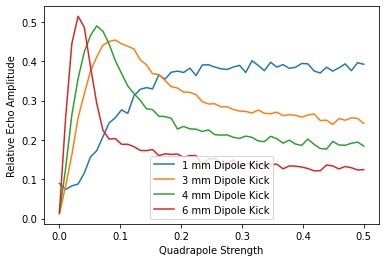

In [47]:
plt.plot(quad_strength, amplitude1mm/0.001, label="1 mm Dipole Kick")
plt.plot(quad_strength, amplitude3mm/0.003, label="3 mm Dipole Kick")
plt.plot(quad_strength, amplitude4mm/0.004, label="4 mm Dipole Kick")
plt.plot(quad_strength, amplitude6mm/0.006, label="6 mm Dipole Kick")
plt.xlabel("Quadrapole Strength")
plt.ylabel("Relative Echo Amplitude")
plt.legend()
plt.savefig("EchoAmplitudePlot.pdf")

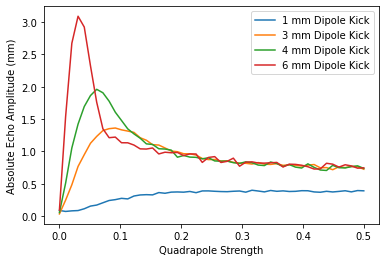

In [48]:
plt.plot(quad_strength, amplitude1mm*1000, label="1 mm Dipole Kick")
plt.plot(quad_strength, amplitude3mm*1000, label="3 mm Dipole Kick")
plt.plot(quad_strength, amplitude4mm*1000, label="4 mm Dipole Kick")
plt.plot(quad_strength, amplitude6mm*1000, label="6 mm Dipole Kick")
plt.xlabel("Quadrapole Strength")
plt.ylabel("Absolute Echo Amplitude (mm)")
plt.legend()
plt.savefig("UnscaledEchoAmplitudePlot.pdf")

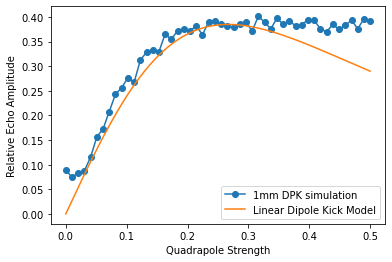

In [89]:
tau = 1400
omega_prime = -3009*2*np.pi
epsilon = 0.0000001
Dp = 0.001

quad_strength_cts = np.linspace(0.0, 0.5, 1000)

Q = np.abs(tau*omega_prime*epsilon*quad_strength_cts)

PredictedAmp = Q/np.power(1 + np.square(Q), 3.0/2.0)

sigma = np.sqrt(beta*epsilon)

plt.plot(quad_strength, amplitude1mm/Dp, marker='o', label="1mm DPK simulation")
plt.plot(quad_strength_cts, PredictedAmp, label="Linear Dipole Kick Model")
plt.legend(loc='lower right')
plt.xlabel("Quadrapole Strength")
plt.ylabel("Relative Echo Amplitude")
plt.savefig("EchoAmplitude1mmDPK.pdf")
# plt.plot(quad_strength[0:5], Q[0:5])

In [60]:
def calculateNonLinearModel(t, omega_0, omega_prime, beta, epsilon, Dp):
    phi = np.linspace(0, 2*np.pi, 250)
    j = np.linspace(0, 0.000020, 250)
    Phi, J = np.meshgrid(phi, j)

    w = omega_0 + omega_prime*J

    Psi_2 = np.exp(-(J + Dp*np.sqrt(2*J/beta)*np.cos(Phi - w*t) + np.square(Dp)/(2*beta))/epsilon)/(2*np.pi*epsilon)
    
    return (np.trapz(np.trapz(Psi_2, x=Phi), x=j), np.trapz(np.trapz(np.sqrt(2*beta*J)*np.cos(Phi)*Psi_2, x=Phi), x=j))

print(calculateNonLinearModel(300, omega_0, omega_prime, beta, epsilon, 0.006))

(0.9999999905445546, -4.4569966451025273e-05)


Normalization:  1.0000000000000004
Average X:  3.1567099212810644e-20
Average Y:  0.006000000000000002
Emittance:  1.9000000000000009e-06
Should be:  1e-07


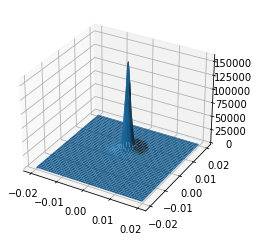

In [55]:
from mpl_toolkits.mplot3d import Axes3D

Dp = 0.006

x = np.linspace(-0.02, 0.02, 401)
y = np.linspace(-0.02, 0.02, 401)

X, Y = np.meshgrid(x, y)
Psi_2 = np.exp(-(np.square(X) + np.square(Y) + np.square(Dp) - 2*Dp*Y)/(2*epsilon*beta))/(2*np.pi*epsilon*beta)


fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Psi_2)

print("Normalization: ", np.trapz(np.trapz(Psi_2, x=X), x=y))
print("Average X: ", np.trapz(np.trapz(X*Psi_2, x=X), x=y))
print("Average Y: ", np.trapz(np.trapz(Y*Psi_2, x=X), x=y))
print("Emittance: ", np.trapz(np.trapz((np.square(X) + np.square(Y))*Psi_2/(2*beta), x=X), x=y))
print("Should be: ", epsilon)

Normalization:  0.9999999887740972
Average X:  1.2653491178707193e-19
Average Y:  -0.006000000003586728
Emittance:  1.9000000003412003e-06
Should be:  1e-07


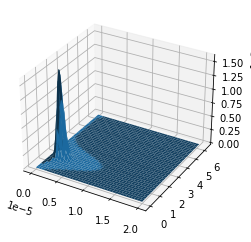

In [57]:
phi = np.linspace(0, 2*np.pi, 201)
j = np.linspace(0, 0.000020, 201)
Phi, J = np.meshgrid(phi, j)

w = omega_0 + omega_prime*J
t=0

Psi_2 = np.exp(-(J - Dp*np.sqrt(2*J/beta)*np.sin(Phi - w*t) + np.square(Dp)/(2*beta))/epsilon)/(2*np.pi*epsilon)
#Psi_2 = np.exp(-J/epsilon)/(2*np.pi*epsilon)
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(J, Phi, Psi_2)

print("Normalization: ", np.trapz(np.trapz(Psi_2, x=Phi), x=j))
print("Average X: ", np.trapz(np.trapz(np.sqrt(2*J*beta)*np.cos(Phi)*Psi_2, x=Phi), x=j))
print("Average Y: ", np.trapz(np.trapz(-np.sqrt(2*J*beta)*np.sin(Phi)*Psi_2, x=Phi), x=j))
print("Emittance: ", np.trapz(np.trapz(J*Psi_2, x=Phi), x=j))
print("Should be: ", epsilon)

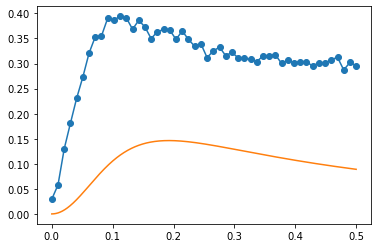

In [274]:
def non_linear_theory(tau, epsilon, beta, Dp, q, omega_0, omega_prime):
    a_theta = Dp/(np.sqrt(beta*epsilon))

    Q = np.abs(tau*omega_prime*epsilon*q)

    z = np.linspace(0.0, 50.0, 1000)
    integrand = np.sqrt(z)*np.exp(-z)*spl.iv(1, a_theta*np.sqrt(2*z))*spl.jv(1, Q*z)
    integral = np.trapz(integrand, z)

   
    return np.sqrt(2*beta*epsilon)*np.exp(np.square(a_theta)/2)*np.sin(q)*integral

dqt = np.empty(len(quad_strength_cts))

for i in range(0, len(quad_strength_cts)):
    dqt[i] = non_linear_theory(3000, 0.0000001, 10, 0.001, quad_strength_cts[i], 0.245*2*np.pi, -3009*2*np.pi)

plt.plot(quad_strength, amplitude1mm/Dp, marker='o')
plt.plot(quad_strength_cts, dqt/Dp)

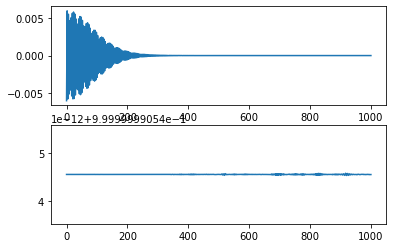

In [74]:
samples = 1000
NLM = np.empty(samples)
ONE = np.empty(samples)
times = np.linspace(0, 1000, samples)

Dp = 0.006

for i in range(0, samples):
    ONE[i], NLM[i] = calculateNonLinearModel(times[i], omega_0, omega_prime, beta, epsilon, Dp)

fig, (ax1, ax2) = plt.subplots(2,1)
    
ax1.plot(times, NLM)
ax2.plot(times, ONE)

C:\Users\henhe\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\henhe\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


124


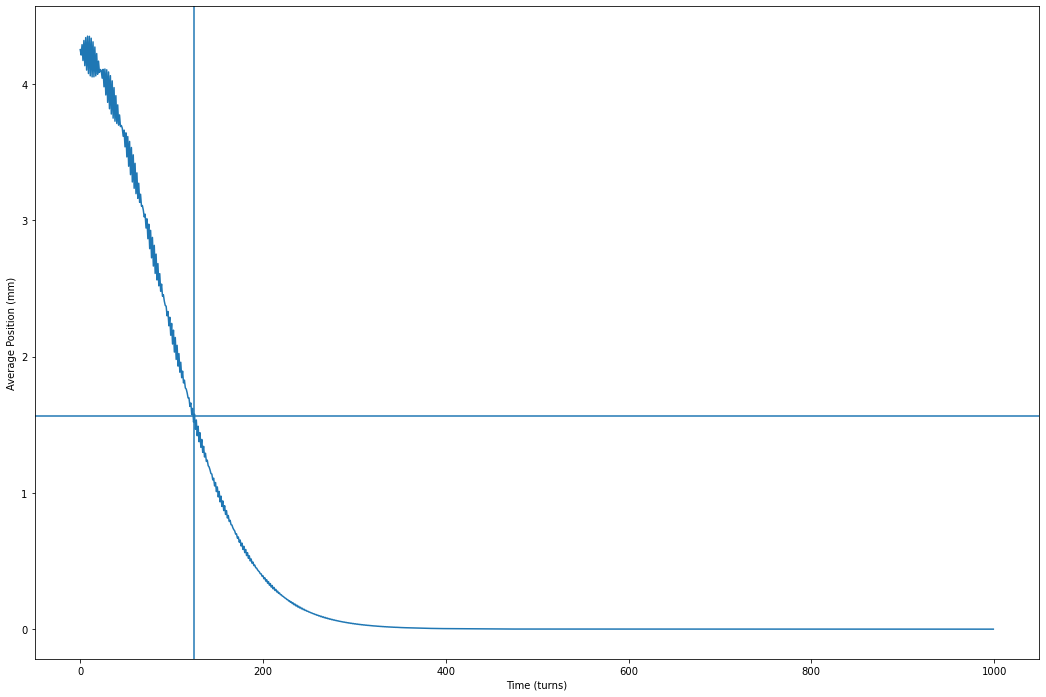

In [75]:


window_size = int((np.pi)/omega_0)

max_amp = np.empty(tau - window_size)
modelDecoheranceTime = 1000

for i in range(0, tau - window_size):
    max_amp[i] = np.sqrt(np.average(np.square(NLM[i:window_size+i])))
#     print("Max amp ", max_amp[i])
    if max_amp[i] <= Dp/(np.e*np.sqrt(2)) and modelDecoheranceTime > i:
        modelDecoheranceTime = i
        
fig, (axMaxAmp) = plt.subplots(1,1)
axMaxAmp.plot(1000*max_amp)

np.set_printoptions(threshold=1500)

modelMax_amp = max_amp

# axMaxAmp.plot(averagePositionCoords2)
axMaxAmp.axvline(x=modelDecoheranceTime)
axMaxAmp.axhline(y=1000*Dp/(np.e*np.sqrt(2)))
axMaxAmp.set_xlabel("Time (turns)")
axMaxAmp.set_ylabel("Average Position (mm)")

print(modelDecoheranceTime)

fig.figsize = (10,15)
fig.set_size_inches(18.0, 12.0)

(2, 20000) (2, 20000) 0.006


C:\Users\henhe\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\henhe\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


121


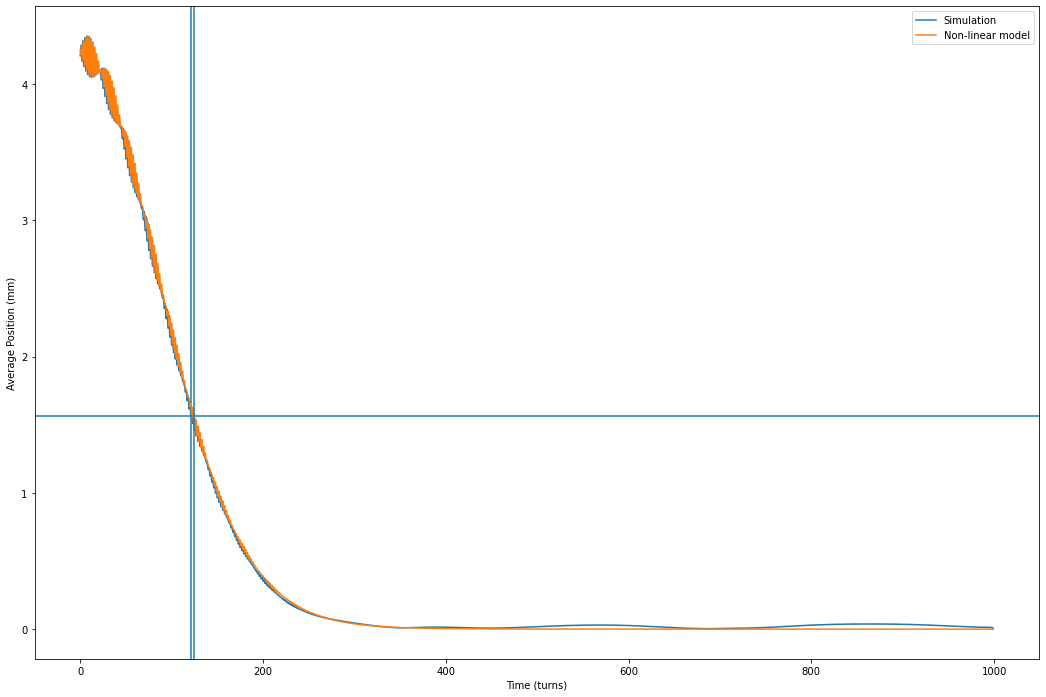

In [78]:
phaseVec = np.empty((2, numPoints))
phaseVec[0,] = np.random.normal(0.0, sigma, size=(1,numPoints))
phaseVec[1,] = np.random.normal(0.0, sigma, size=(1,numPoints))

Dp = 0.006

omega = setOmega(phaseVec, omega_0, omega_prime)
fig, axMaxAmp = plt.subplots(1,1)
(phaseVec, omega) = dipoleKick(phaseVec, omega, Dp, omega_0, omega_prime)
phaseVec, averagePositionCoords2, J, theta, phaseVecVideo2 = recordTurnData(phaseVec, omega, 1000)

window_size = int((2*np.pi)/omega_0)

max_amp = np.empty(tau - window_size)
decoheranceTime = 1000

for i in range(0, tau - window_size):
    max_amp[i] = np.sqrt(np.average(np.square(averagePositionCoords2[i:window_size+i])))
#     print("Max amp ", max_amp[i])
    if max_amp[i] <= Dp/(np.e*np.sqrt(2)) and decoheranceTime > i:
        decoheranceTime = i
        
axMaxAmp.plot(1000*max_amp, label="Simulation")

np.set_printoptions(threshold=1500)

# axMaxAmp.plot(averagePositionCoords2)
axMaxAmp.axvline(x=decoheranceTime)
axMaxAmp.axhline(y=1000*Dp/(np.e*np.sqrt(2)))
axMaxAmp.set_xlabel("Time (turns)")
axMaxAmp.set_ylabel("Average Position (mm)")

axMaxAmp.plot(1000*modelMax_amp, label="Non-linear model")

axMaxAmp.axvline(x=modelDecoheranceTime)
axMaxAmp.set_xlabel("Time (turns)")
axMaxAmp.set_ylabel("Average Position (mm)")
axMaxAmp.legend()

print(decoheranceTime)

fig.figsize = (10,15)
fig.set_size_inches(18.0, 12.0)
fig.savefig("AvgPosRMSModelVSim.pdf")

(2, 20000) (2, 20000) 0.0001
New time 590
(2, 20000) (2, 20000) 0.0002112359550561798
New time 615
(2, 20000) (2, 20000) 0.00032247191011235956
New time 640
(2, 20000) (2, 20000) 0.0004337078651685394
New time 640
(2, 20000) (2, 20000) 0.0005449438202247192
New time 623
(2, 20000) (2, 20000) 0.000656179775280899
New time 556
(2, 20000) (2, 20000) 0.0007674157303370788
New time 566
(2, 20000) (2, 20000) 0.0008786516853932586
New time 529
(2, 20000) (2, 20000) 0.0009898876404494383
New time 523
(2, 20000) (2, 20000) 0.0011011235955056182
New time 499
(2, 20000) (2, 20000) 0.0012123595505617979
New time 452
(2, 20000) (2, 20000) 0.0013235955056179777
New time 456
(2, 20000) (2, 20000) 0.0014348314606741576
New time 411
(2, 20000) (2, 20000) 0.0015460674157303372
New time 397
(2, 20000) (2, 20000) 0.001657303370786517
New time 373
(2, 20000) (2, 20000) 0.0017685393258426968
New time 358
(2, 20000) (2, 20000) 0.0018797752808988766
New time 340
(2, 20000) (2, 20000) 0.0019910112359550563
New

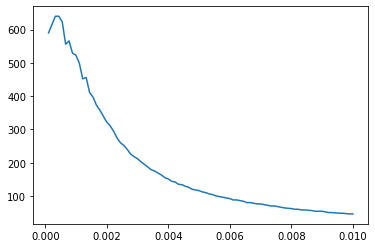

In [72]:
def runDecoheranceSimulation(numPoints, tau, epsilon, Dp, omega_0, omega_prime, total_time, beta=10):
    sigma = np.sqrt(beta*epsilon)
    
    phaseVec = np.empty((2, numPoints))
    phaseVec[0,] = np.random.normal(0.0, sigma, size=(1,numPoints))
    phaseVec[1,] = np.random.normal(0.0, sigma, size=(1,numPoints))

    omega = setOmega(phaseVec, omega_0, omega_prime)
    (phaseVec, omega) = dipoleKick(phaseVec, omega, Dp, omega_0, omega_prime)
    phaseVec, averagePositionCoords2, J, theta, phaseVecVideo2 = recordTurnData(phaseVec, omega, tau)

    window_size = int(20*(2*np.pi)/omega_0)

    max_amp = np.empty(tau - window_size)
    decoheranceTime = 1400

    for i in range(0, tau - window_size):
        max_amp[i] = np.sqrt(np.average(np.square(averagePositionCoords2[i:window_size+i])))
        if max_amp[i] <= Dp/(np.e*np.sqrt(2)) and decoheranceTime > i:
            print("New time", i)
            decoheranceTime = i
            
    return decoheranceTime


samples = 90

Dp = np.linspace(0.0001, 0.010, samples)

decoheranceTimes = np.empty(samples)

for i in range(0, samples):
    decoheranceTimes[i] = runDecoheranceSimulation(20000, 1400, 0.0000001, Dp[i], 0.245*2*np.pi, -3009*2*np.pi, 5000)

plt.plot(Dp, decoheranceTimes)

New time 673   Dp 0.0001
New time 667   Dp 0.0002112359550561798
New time 657   Dp 0.00032247191011235956
New time 644   Dp 0.0004337078651685394
New time 622   Dp 0.0005449438202247192
New time 602   Dp 0.000656179775280899
New time 579   Dp 0.0007674157303370788
New time 553   Dp 0.0008786516853932586
New time 528   Dp 0.0009898876404494383
New time 502   Dp 0.0011011235955056182
New time 475   Dp 0.0012123595505617979
New time 449   Dp 0.0013235955056179777
New time 426   Dp 0.0014348314606741576
New time 402   Dp 0.0015460674157303372
New time 381   Dp 0.001657303370786517
New time 359   Dp 0.0017685393258426968
New time 341   Dp 0.0018797752808988766
New time 324   Dp 0.0019910112359550563
New time 306   Dp 0.002102247191011236
New time 290   Dp 0.0022134831460674156
New time 277   Dp 0.0023247191011235954
New time 263   Dp 0.0024359550561797753
New time 251   Dp 0.002547191011235955
New time 239   Dp 0.002658426966292135
New time 229   Dp 0.002769662921348315
New time 221   Dp 0.

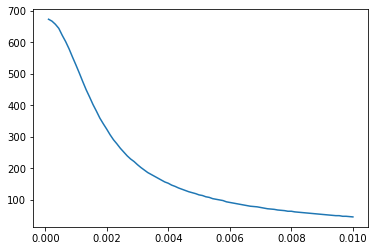

In [83]:
def calcDecoheranceModel(tau, epsilon, Dp, omega_0, omega_prime, beta=10):
    samples = tau
    NLM = np.empty(samples)
    ONE = np.empty(samples)
    times = np.linspace(0, tau, samples)

    for i in range(0, samples):
        ONE[i], NLM[i] = calculateNonLinearModel(times[i], omega_0, omega_prime, beta, epsilon, Dp)

    window_size = int(20*(2*np.pi)/omega_0)

    max_amp = np.empty(tau - window_size)
    decoheranceTime = 1400

    for i in range(0, tau - window_size):
        max_amp[i] = np.sqrt(np.average(np.square(NLM[i:window_size+i])))
        if max_amp[i] <= Dp/(np.e*np.sqrt(2)) and decoheranceTime > i:
            print("New time", i, "  Dp", Dp)
            decoheranceTime = i
            
    return decoheranceTime

samples = 90
modelDecoheranceTimes = np.empty(samples)
Dp = np.linspace(0.0001, 0.010, samples)

for i in range(0, samples):
    modelDecoheranceTimes[i] = calcDecoheranceModel(1400, 0.0000001, Dp[i], 0.245*2*np.pi, -3009*2*np.pi)

plt.plot(Dp, modelDecoheranceTimes)

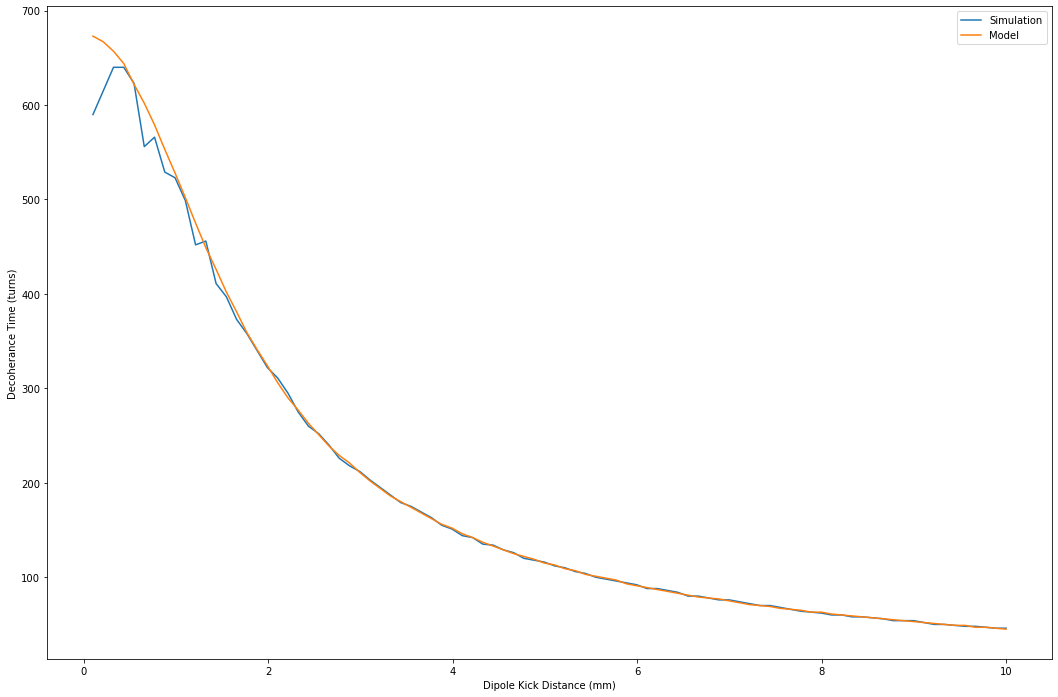

In [85]:
fig, (axMaxAmp) = plt.subplots(1,1)

DpSim = np.linspace(0.0001, 0.010, 90)

axMaxAmp.plot(1000*DpSim, decoheranceTimes, label="Simulation")
axMaxAmp.plot(1000*Dp, modelDecoheranceTimes, label="Model")
axMaxAmp.set_xlabel("Dipole Kick Distance (mm)")
axMaxAmp.set_ylabel("Decoherance Time (turns)")
axMaxAmp.legend()

fig.figsize = (10,15)
fig.set_size_inches(18.0, 12.0)
fig.savefig("DecoheranceTime.pdf")

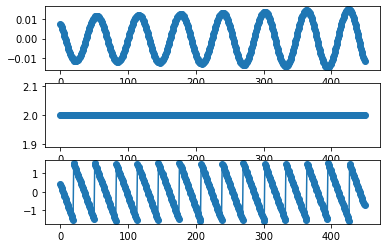

In [5]:
numPoints = 20000
tau = 450

phaseVec = np.empty((2, numPoints))
phaseVec[0,] = np.random.normal(0.0, 1.0, size=(1,numPoints))
phaseVec[1,] = np.random.normal(0.0, 1.0, size=(1,numPoints))

omega = setOmega(phaseVec)
fig, (axPos, axJ, axTheta) = plt.subplots(3,1)
phaseVec = plotTurns(phaseVec, omega, tau, axPos, axJ, axTheta)